In [ ]:
!pip install matplotlib deap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 2.9 MB/s eta 0:00:00


In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

In [ ]:
# defining the problem in programming terms
# number of locations to be visited and their coordinates, coordinates of the depot and the number of vehicles available to us
num_locations = 20
locations = [(random.randint(0, 100),random.randint(0,100)) for _ in range(num_locations)]
depot = (13,25)
num_vehicles = 3


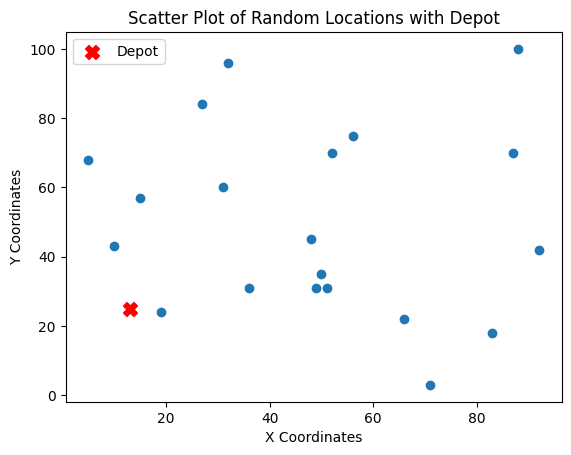

In [ ]:
# representing the coordinates

plt.scatter(list(x[0] for x in locations), list(x[1] for x in locations))
plt.scatter(depot[0], depot[1], color='red', marker='X', s=100, label='Depot')

plt.xlabel('X Coordinates')
plt.ylabel('Y Coordinates')
plt.title('Scatter Plot of Random Locations with Depot')
plt.legend()

plt.show()

In [ ]:
# setting up the Genetic algorithm
creator.create("FitnessMin", base.Fitness, weights=(-1.0,-1.0)) # the two parameters to minimise are, total distance and total std dev of the distance travelled by each vehicle
creator.create("Individual", list, fitness=creator.FitnessMin) # defining an individual structure with fitness attribute

/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [ ]:
toolbox = base.Toolbox()

toolbox.register("indices", random.sample, range(num_locations), num_locations)
# "indices" function is used to generate random indices representing the order in which the customers will be visited
# the logic is, we will generate a random order and then divide that order into each num_vehicles
# for example, if the random order is 1,2,3,4,5,6,7,8,9 and there are 3 vehicles then
# vehicle 1 will visit 1,4,7
# vehicle 2 will visit 2,5,8
# vehicle 3 will visit 3,6,9
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices) # This function creates an Individual as a random list of indices, i.e., locations
toolbox.register("population", tools.initRepeat, list, toolbox.individual) # This function creates a population of individuals

In [ ]:
# Fitness Function
def evalVRP(individual): # Calculating the total distance of routes and the standard deviation among the distances and return (distance, std dev)
  distances = []
  vehicle_routes = []
  for i in range(num_vehicles):
      each_vehicle_route = [depot] + [locations[individual[j]] for j in range(i, num_locations, num_vehicles)] + [depot] # defining the route for each vehicle starting from and ending at the depot
      vehicle_routes.append(each_vehicle_route)
      each_vehicle_distance = 0
      for j in range(len(each_vehicle_route)-1): # calculating the distance that the vehicle would have to cover when tracing the given route
        each_vehicle_distance += ((each_vehicle_route[j][0] - each_vehicle_route[j+1][0])**2 + (each_vehicle_route[j][1] - each_vehicle_route[j+1][1])**2)**0.5
      distances.append(each_vehicle_distance)
  # print("--- Printing the vehicle routes ---")
  # print(vehicle_routes)
  # print("--- Printing the distances to be covered by each vehicle ---")
  # print(distances)

  return sum(distances), np.std(distances)

toolbox.register("evaluate", evalVRP)

In [ ]:
# Genetic Operators
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", tools.cxUniformPartialyMatched, indpb=0.5)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)

In [ ]:
# Plotting Function
def plot_routes(individual, title="Routes"):
    plt.scatter(list(x[0] for x in locations), list(x[1] for x in locations))
    plt.scatter(depot[0], depot[1], color='red', marker='X', s=100, label='Depot')

    for i in range(num_vehicles):
        route = [depot] + [locations[individual[j]] for j in range(i, num_locations, num_vehicles)] + [depot]
        x = [x[0] for x in route]
        y = [x[1] for x in route]
        plt.plot(x, y, label=f'Vehicle {i+1}')

    plt.xlabel('X Coordinates')
    plt.ylabel('Y Coordinates')
    plt.title(title)
    plt.legend()
    plt.show()

gen	nevals	avg    	min    
0  	300   	599.199	4.94856
1  	235   	584.804	4.83337
2  	217   	571.747	3.06026
3  	229   	571.515	4.83337
4  	234   	570.927	3.44373
5  	231   	565.018	3.44373
6  	244   	569.917	3.44373
7  	215   	563.501	4.70453
8  	233   	561.115	1.85339
9  	225   	559.577	4.17353
10 	240   	560.125	2.86123
11 	226   	553.502	6.41916
12 	236   	554.696	1.54986
13 	230   	558.927	1.6132 
14 	229   	555.479	3.66784
15 	221   	550.75 	3.66784
16 	220   	549.855	4.8599 
17 	232   	544.211	3.77546
18 	218   	540.507	2.31532
19 	237   	548.215	1.92187
20 	235   	544.165	1.82505
21 	229   	547.743	5.85505
22 	237   	549.466	5.19892
23 	228   	547.588	7.01891
24 	219   	542.18 	2.16376
25 	243   	549.879	1.72798
26 	238   	548.102	1.82985
27 	222   	552.049	2.4598 
28 	229   	548.836	2.4598 
29 	239   	548.671	4.08332
30 	217   	549.497	1.49488
31 	230   	548.176	3.92406
32 	239   	547.663	3.92406
33 	220   	543.06 	3.92406
34 	229   	542.747	3.48462
35 	214   	537.872	2.7192 
3

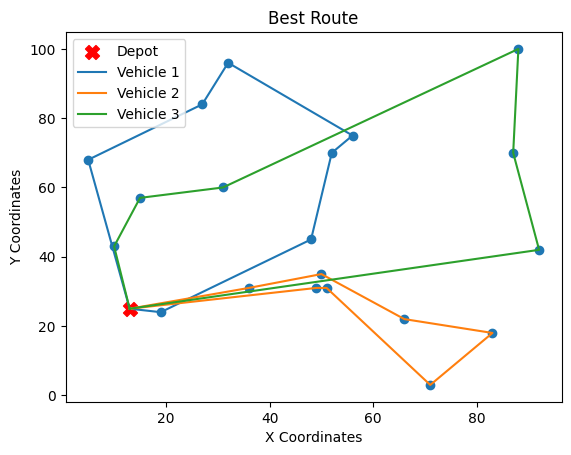

In [ ]:
# Running the Genetic Algorithm
def main():
    random.seed(42)
    pop = toolbox.population(n=300)
    hof = tools.HallOfFame(1)

    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)

    algorithms.eaSimple(pop, toolbox, 0.7, 0.2, 300, stats=stats, halloffame=hof)

    plot_routes(hof[0], title="Best Route")

    return pop, stats, hof

if __name__ == "__main__":
    main()